In [1]:
import pandas as pd
import matplotlib
import numpy as np
import re
import string 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [2]:
#Read dataset
df_train = pd.read_csv("train.tsv", sep="\t")

#Read data test
df_test = pd.read_csv("test.tsv", sep="\t")

In [3]:
df_train.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


# Flowchart Sistem
<img src="Flow.png">

# Function Cleaning Data

In [4]:
#Declare set tanda baca
punc_set = string.punctuation
punc_set

#Fungsi untuk menghilangkan tanda baca
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

#Tokenizing untuk seluruh data agar direpresentasikan sebagai datapoint
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Import stopword setelah Tokenize
stopwords = nltk.corpus.stopwords.words('english')

#Function untuk stopword dari tokenized word
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

#Importing 'WordNetLemmatizer' untuk function lemmatizing 
wnl = nltk.wordnet.WordNetLemmatizer()

#Lemmatizing untuk data text yg sudah di tokenisasi
def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma


####Function Stemming 
####NOTE: Tidak digunakan, hanya uji coba
def stemming(tokenized_text):
    text= [sno.stem(word) for word in tokenized_text]
    return text

ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text= [ps.stem(word) for word in tokenized_text]
    return text

In [5]:
#Test tokenize
x = tokenize('I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it.')
print(x)

['I', 'remember', 'this', 'film', 'it', 'was', 'the', 'first', 'film', 'i', 'had', 'watched', 'at', 'the', 'cinema', 'the', 'picture', 'was', 'dark', 'in', 'places', 'i', 'was', 'very', 'nervous', 'it', 'was', 'back', 'in', '74', '75', 'my', 'Dad', 'took', 'me', 'my', 'brother', 'sister', 'to', 'Newbury', 'cinema', 'in', 'Newbury', 'Berkshire', 'England', 'I', 'recall', 'the', 'tigers', 'and', 'the', 'lots', 'of', 'snow', 'in', 'the', 'film', 'also', 'the', 'appearance', 'of', 'Grizzly', 'Adams', 'actor', 'Dan', 'Haggery', 'i', 'think', 'one', 'of', 'the', 'tigers', 'gets', 'shot', 'and', 'dies', 'If', 'anyone', 'knows', 'where', 'to', 'find', 'this', 'on', 'DVD', 'etc', 'please', 'let', 'me', 'know', 'The', 'cinema', 'now', 'has', 'been', 'turned', 'in', 'a', 'fitness', 'club', 'which', 'is', 'a', 'very', 'big', 'shame', 'as', 'the', 'nearest', 'cinema', 'now', 'is', '20', 'miles', 'away', 'would', 'love', 'to', 'hear', 'from', 'others', 'who', 'have', 'seen', 'this', 'film', 'or', 'a

In [6]:
#Test Remove Stopwords
x = tokenize('I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it.')
y = remove_stopwords(x)
print(y)

['I', 'remember', 'film', 'first', 'film', 'watched', 'cinema', 'picture', 'dark', 'places', 'nervous', 'back', '74', '75', 'Dad', 'took', 'brother', 'sister', 'Newbury', 'cinema', 'Newbury', 'Berkshire', 'England', 'I', 'recall', 'tigers', 'lots', 'snow', 'film', 'also', 'appearance', 'Grizzly', 'Adams', 'actor', 'Dan', 'Haggery', 'think', 'one', 'tigers', 'gets', 'shot', 'dies', 'If', 'anyone', 'knows', 'find', 'DVD', 'etc', 'please', 'let', 'know', 'The', 'cinema', 'turned', 'fitness', 'club', 'big', 'shame', 'nearest', 'cinema', '20', 'miles', 'away', 'would', 'love', 'hear', 'others', 'seen', 'film', 'like', '']


In [7]:
#Test Lemmatizing
x = tokenize('I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it.')
z = lemmatizing(x)
print(z)

['I', 'remember', 'this', 'film', 'it', 'wa', 'the', 'first', 'film', 'i', 'had', 'watched', 'at', 'the', 'cinema', 'the', 'picture', 'wa', 'dark', 'in', 'place', 'i', 'wa', 'very', 'nervous', 'it', 'wa', 'back', 'in', '74', '75', 'my', 'Dad', 'took', 'me', 'my', 'brother', 'sister', 'to', 'Newbury', 'cinema', 'in', 'Newbury', 'Berkshire', 'England', 'I', 'recall', 'the', 'tiger', 'and', 'the', 'lot', 'of', 'snow', 'in', 'the', 'film', 'also', 'the', 'appearance', 'of', 'Grizzly', 'Adams', 'actor', 'Dan', 'Haggery', 'i', 'think', 'one', 'of', 'the', 'tiger', 'get', 'shot', 'and', 'dy', 'If', 'anyone', 'know', 'where', 'to', 'find', 'this', 'on', 'DVD', 'etc', 'please', 'let', 'me', 'know', 'The', 'cinema', 'now', 'ha', 'been', 'turned', 'in', 'a', 'fitness', 'club', 'which', 'is', 'a', 'very', 'big', 'shame', 'a', 'the', 'nearest', 'cinema', 'now', 'is', '20', 'mile', 'away', 'would', 'love', 'to', 'hear', 'from', 'others', 'who', 'have', 'seen', 'this', 'film', 'or', 'any', 'other', '

## TF-IDF

Perhitungan untuk idf yang dimplementasikan dengan sklearn adalah sebagai berikut:

$$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$
Perhitungan untuk tf-idf yang dimplementasikan dengan sklearn adalah sebagai beriku:

$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d)+1)$$

In [8]:
#Input dataset(Train) ke vectorizer
tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(df_train['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df_train['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [9]:
print("Dimension after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Dimension after applying TF-IDF vectorizer:


(156060, 128269)

In [10]:
X = train_vectorized
y = df_train.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [11]:
#Declare performance
performance_metrics = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['BernoulliNB', 'MultinomialNB', 'LogisticRegression', 'LinearSVC'])

# Model Naive Bayes
<img src="NaiveBayes.png">


Evaluation of BernoulliNB with train-test split:

accuracy_score:  0.6074907087017813

Weighted Averaged validation metrics
precision_score:  0.5861681809250799
recall_score:  0.6074907087017813
f1_score:  0.5811297701503261


elapsed time in seconds:  0.2924056053161621



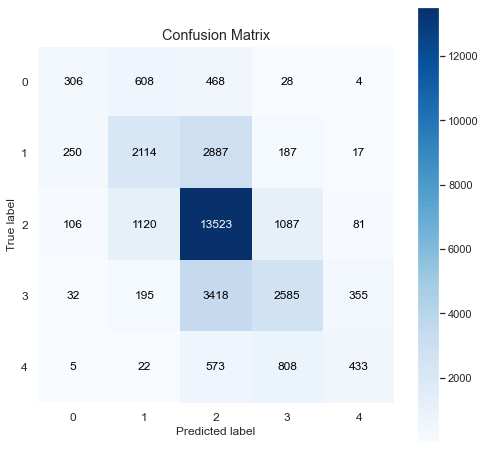

In [12]:
#Bernoulli NB
start_time = time.time()
    
print()
print("Evaluation of BernoulliNB with train-test split:")

clf_BernoulliNB = BernoulliNB()
clf_BernoulliNB.fit(xtrain, ytrain)
predictions = clf_BernoulliNB.predict(xvalid)

print()
print("accuracy_score: ", accuracy_score(yvalid, predictions))
print()

print("Weighted Averaged validation metrics")
print("precision_score: ", precision_score(yvalid, predictions, average='weighted'))
print("recall_score: ", recall_score(yvalid, predictions, average='weighted'))
print("f1_score: ", f1_score(yvalid, predictions, average='weighted'))


performance_metrics.loc['BernoulliNB']['training-time'] = time.time() - start_time
performance_metrics.loc['BernoulliNB']['accuracy'] = accuracy_score(yvalid, predictions)
performance_metrics.loc['BernoulliNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')
print()

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

#Bernoulli NB results in a accuracy of 60% and F1 score 56%

In [13]:
print('Classification Report: ')
print(classification_report(yvalid, predictions))
print('-------------------------------------------------------------------------------------------------------------------------------')

Classification Report: 
              precision    recall  f1-score   support

           0       0.44      0.22      0.29      1414
           1       0.52      0.39      0.44      5455
           2       0.65      0.85      0.74     15917
           3       0.55      0.39      0.46      6585
           4       0.49      0.24      0.32      1841

    accuracy                           0.61     31212
   macro avg       0.53      0.42      0.45     31212
weighted avg       0.59      0.61      0.58     31212

-------------------------------------------------------------------------------------------------------------------------------



Evaluation of MultinomialNB with train-test split:

accuracy_score:  0.6073945918236575

Weighted Averaged validation metrics
precision_score:  0.6125529384732012
recall_score:  0.6073945918236575
f1_score:  0.5509632749218774


elapsed time in seconds:  0.18503475189208984



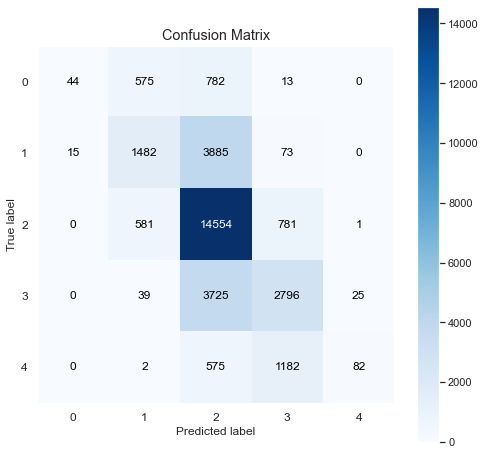

In [14]:
#Multinomial NB
start_time = time.time()
    
print()
print("Evaluation of MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)

print()
print("accuracy_score: ", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score: ", precision_score(yvalid, predictions, average='weighted'))
print("recall_score: ", recall_score(yvalid, predictions, average='weighted'))
print("f1_score: ", f1_score(yvalid, predictions, average='weighted'))


performance_metrics.loc['MultinomialNB']['training-time'] = time.time() - start_time
performance_metrics.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
performance_metrics.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')
print()

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

#Multinomail NB results in a accuracy of 61% and F1 score 55%

In [15]:
print('Classification Report: ')
print(classification_report(yvalid, predictions))
print('-------------------------------------------------------------------------------------------------------------------------------')

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.03      0.06      1414
           1       0.55      0.27      0.36      5455
           2       0.62      0.91      0.74     15917
           3       0.58      0.42      0.49      6585
           4       0.76      0.04      0.08      1841

    accuracy                           0.61     31212
   macro avg       0.65      0.34      0.35     31212
weighted avg       0.61      0.61      0.55     31212

-------------------------------------------------------------------------------------------------------------------------------


# Logistic Regression

<img src="https://i.imgur.com/VieM41f.png">


accuracy_score:  0.6355888760733052

Weighted Averaged validation metrics
precision_score:  0.6259403824347335
recall_score:  0.6355888760733052
f1_score:  0.6018126280290436


elapsed time in seconds:  10.715835332870483



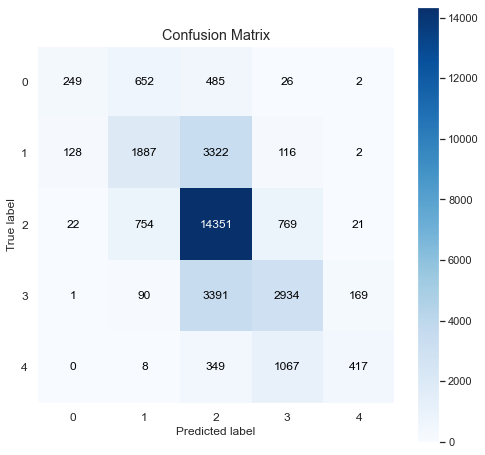

In [16]:
#Logistic Regression
start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)

print()
print("accuracy_score: ", accuracy_score(yvalid, predictions))
print()

print("Weighted Averaged validation metrics")
print("precision_score: ", precision_score(yvalid, predictions, average='weighted'))
print("recall_score: ", recall_score(yvalid, predictions, average='weighted'))
print("f1_score: ", f1_score(yvalid, predictions, average='weighted'))
print()

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


performance_metrics.loc['LogisticRegression']['training-time'] = time.time() - start_time
performance_metrics.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
performance_metrics.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

In [17]:
print('Classification Report: ')
print(classification_report(yvalid, predictions))
print('-------------------------------------------------------------------------------------------------------------------------------')

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.18      0.27      1414
           1       0.56      0.35      0.43      5455
           2       0.66      0.90      0.76     15917
           3       0.60      0.45      0.51      6585
           4       0.68      0.23      0.34      1841

    accuracy                           0.64     31212
   macro avg       0.62      0.42      0.46     31212
weighted avg       0.63      0.64      0.60     31212

-------------------------------------------------------------------------------------------------------------------------------


# SVM
<img src="SVM.png">


Evaluation of LinearSVC, multi_class='ovr', with train-test split:

accuracy_score:  0.6542996283480712

Weighted Averaged validation metrics
precision_score:  0.6428528556861811
recall_score:  0.6542996283480712
f1_score:  0.6455568928146563


elapsed time in seconds:  5.835611581802368



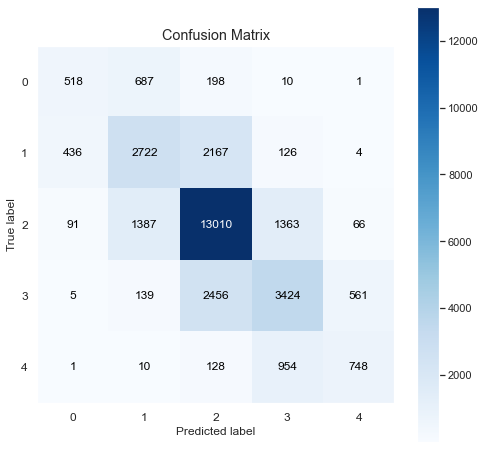

In [18]:
start_time = time.time()
    
print()
print("Evaluation of LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)

print()
print("accuracy_score: ", accuracy_score(yvalid, predictions))
print()

print("Weighted Averaged validation metrics")
print("precision_score: ", precision_score(yvalid, predictions, average='weighted'))
print("recall_score: ", recall_score(yvalid, predictions, average='weighted'))
print("f1_score: ", f1_score(yvalid, predictions, average='weighted'))


performance_metrics.loc['LinearSVC']['training-time'] = time.time() - start_time
performance_metrics.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
performance_metrics.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')
print()

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)
print()

print("elapsed time in seconds: ", time.time() - start_time)
print()

In [19]:
print('Classification Report Support Vector Machine: ')
print(classification_report(yvalid, predictions))
print('-------------------------------------------------------------------------------------------------------------------------------')

Classification Report Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.49      0.37      0.42      1414
           1       0.55      0.50      0.52      5455
           2       0.72      0.82      0.77     15917
           3       0.58      0.52      0.55      6585
           4       0.54      0.41      0.46      1841

    accuracy                           0.65     31212
   macro avg       0.58      0.52      0.55     31212
weighted avg       0.64      0.65      0.65     31212

-------------------------------------------------------------------------------------------------------------------------------


# Method Comparison (Pre-Tune)

In [20]:
performance_metrics.sort_values(by="accuracy", ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.6543,0.645557,5.767316
LogisticRegression,0.635589,0.635589,10.705833
BernoulliNB,0.607491,0.58113,0.167565
MultinomialNB,0.607395,0.550963,0.100015


<AxesSubplot:title={'center':'Accuracy'}>

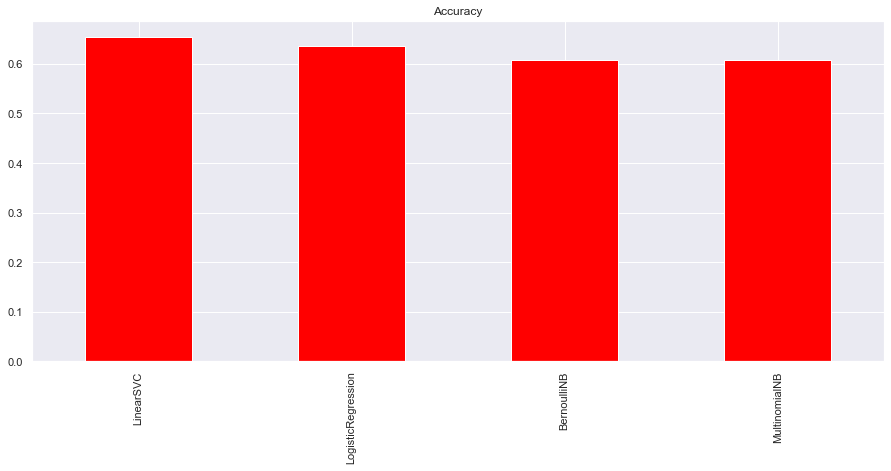

In [21]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
performance_metrics.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar",color="red", title="Accuracy")

In [22]:
performance_metrics.sort_values(by="F1-score", ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.6543,0.645557,5.767316
LogisticRegression,0.635589,0.635589,10.705833
BernoulliNB,0.607491,0.58113,0.167565
MultinomialNB,0.607395,0.550963,0.100015


<AxesSubplot:title={'center':'F1-Score'}>

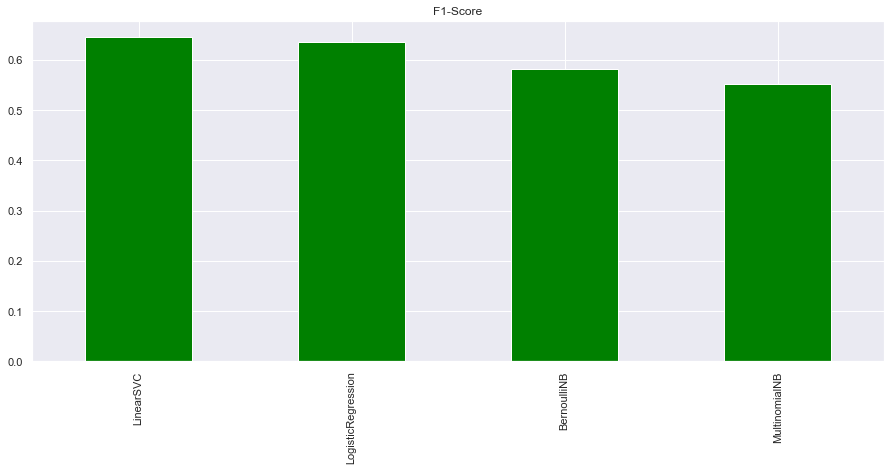

In [23]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
performance_metrics.sort_values(by="F1-score", ascending=False)["F1-score"].plot(kind="bar", color="green", title="F1-Score")

# Tuning Model

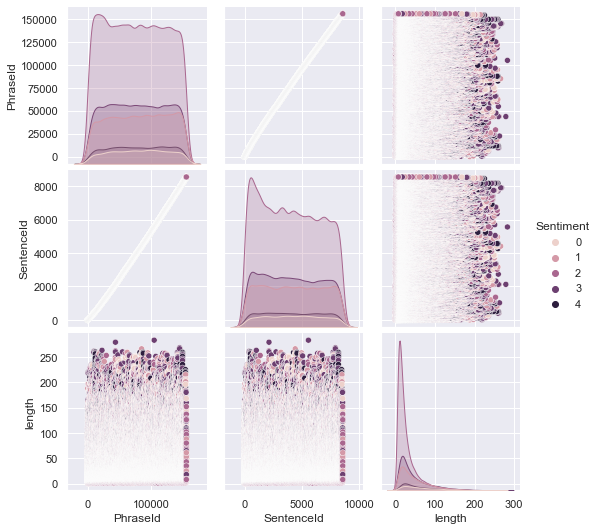

In [24]:
df_train['length'] = df_train['Phrase'].apply(len)
sns.pairplot(df_train,hue='Sentiment',vars=['PhraseId','SentenceId','length'])

<AxesSubplot:ylabel='Frequency'>

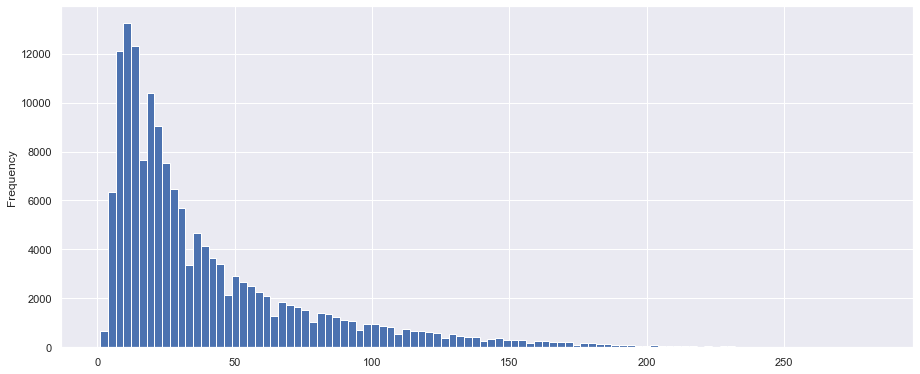

In [25]:
df_train['length'].plot(bins=100, kind='hist')

In [26]:
from matplotlib import pyplot as plt

# HYPERPARAMETER TUNING

In [27]:
data=pd.read_csv('test.csv')
data = data[~data.quote.isnull()]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
#Declare Tuning Performance
tuning_performance = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['BernoulliNB', 'MultinomialNB', 'LogisticRegression', 'LinearSVC'])
tuning_performance_10 = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['BernoulliNB', 'MultinomialNB', 'LogisticRegression', 'LinearSVC'])

In [30]:
tfidfvectorizer = TfidfVectorizer(min_df=5, stop_words='english')
Xtfidf=tfidfvectorizer.fit_transform(data.quote)

In [31]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [32]:
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.fresh == 'fresh').values.astype(np.int) #class 1: should be fresh 
    return X, y

In [33]:
xt, yt = make_xy(data)

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/1594670877.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (critics.fresh == 'fresh').values.astype(np.int) #class 1: should be fresh


## TUNING NAIVE BAYES BERNOULLI

accuracy score:0.7741728236427883
precision score:  0.8347768801903347
recall score:  0.7741728236427883
f1 score:  0.7465370928009561



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

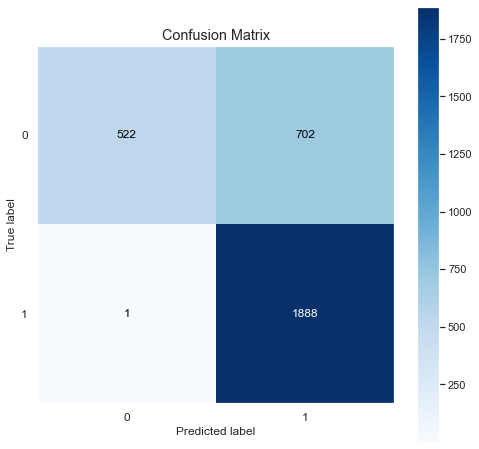

In [34]:
#Bernoulli NB 80:20
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.2)
bnb = BernoulliNB()
bnb.fit(X_test, y_test)
y_pred = bnb.predict(X_test)
print('accuracy score:'+ str(accuracy_score(y_test, bnb.predict(X_test))))
print('precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print()

tuning_performance.loc['BernoulliNB']['training-time'] = time.time() - start_time
tuning_performance.loc['BernoulliNB']['accuracy'] = accuracy_score(y_test, y_pred)
tuning_performance.loc['BernoulliNB']['F1-score'] = f1_score(y_test, y_pred, average='weighted')

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

accuracy score:0.6679511881824021
precision score:  0.7870832046360441
recall score:  0.6679511881824021
f1 score:  0.5896459397731426



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

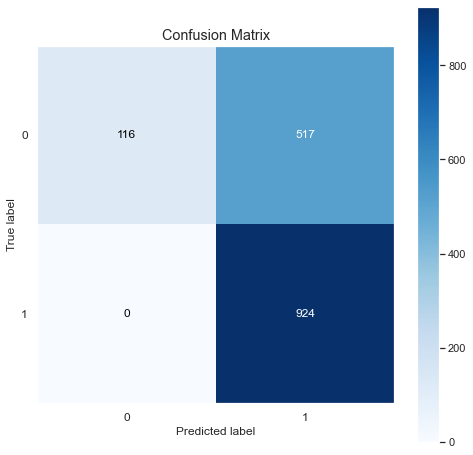

In [35]:
#Bernoulli NB 90:10
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.1)
bnb = BernoulliNB()
bnb.fit(X_test, y_test)
y_pred = bnb.predict(X_test)
print('accuracy score:'+ str(accuracy_score(y_test, bnb.predict(X_test))))
print('precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print()

tuning_performance.loc['BernoulliNB']['training-time'] = time.time() - start_time
tuning_performance.loc['BernoulliNB']['accuracy'] = accuracy_score(y_test, y_pred)
tuning_performance.loc['BernoulliNB']['F1-score'] = f1_score(y_test, y_pred, average='weighted')

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

## TUNING NAIVE BAYES MULTINOMIAL

accuracy score:0.9306135560552522
precision score:  0.9358173672268004
recall score:  0.9306135560552522
f1 score:  0.9292151797045028



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

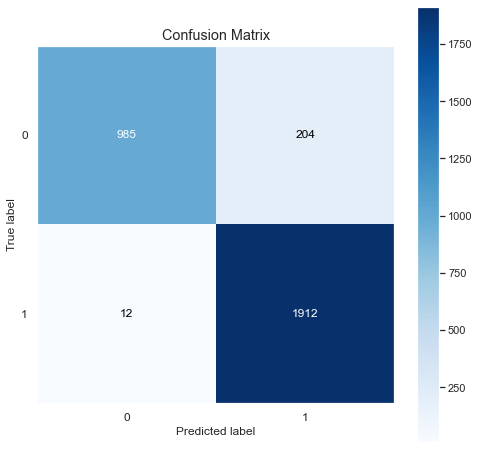

In [49]:
#MultinomialNB 80:20
#Try TF-IDF 
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.2)
mnb = MultinomialNB(alpha=1)
mnb.fit(X_test, y_test)
y_pred = mnb.predict(X_test)
print('accuracy score:'+ str(accuracy_score(y_test, mnb.predict(X_test))))
print('precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print()

tuning_performance.loc['MultinomialNB']['training-time'] = time.time() - start_time
tuning_performance.loc['MultinomialNB']['accuracy'] = accuracy_score(y_test, y_pred)
tuning_performance.loc['MultinomialNB']['F1-score'] = f1_score(y_test, y_pred, average='weighted')


sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

accuracy score:0.9235709698137444
precision score:  0.9317603907229907
recall score:  0.9235709698137444
f1 score:  0.9217502612680957



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

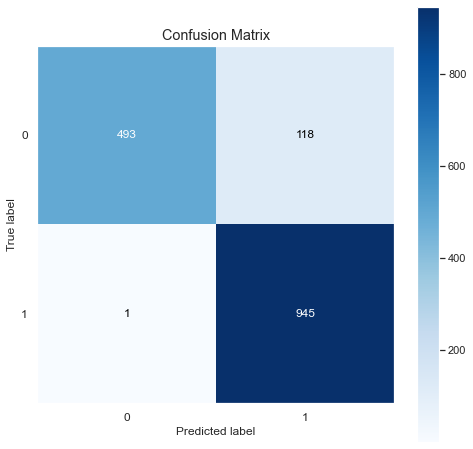

In [47]:
#MultinomialNB 90:10
#Try TF-IDF 
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.1)
mnb = MultinomialNB(alpha=1)
mnb.fit(X_test, y_test)
y_pred = mnb.predict(X_test)
print('accuracy score:'+ str(accuracy_score(y_test, mnb.predict(X_test))))
print('precision score: ', precision_score(y_test, y_pred, average='weighted'))
print('recall score: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred, average='weighted'))
print()

tuning_performance.loc['MultinomialNB']['training-time'] = time.time() - start_time
tuning_performance.loc['MultinomialNB']['accuracy'] = accuracy_score(y_test, y_pred)
tuning_performance.loc['MultinomialNB']['F1-score'] = f1_score(y_test, y_pred, average='weighted')


sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

## TUNING LOGISTIC REGRESSION

In [38]:
from sklearn.model_selection import GridSearchCV

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/784276575.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape[0], dtype=np.bool)
C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



LogisticRegression best parameters and score
Best score: 0.736906 using {'C': 10, 'solver': 'saga', 'tol': 0.1}
Accuracy score after tuning: 0.7471892065531641
precision score:  0.7422901212063854
recall score:  0.7471892065531641
f1 score:  0.7435655661959666



C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

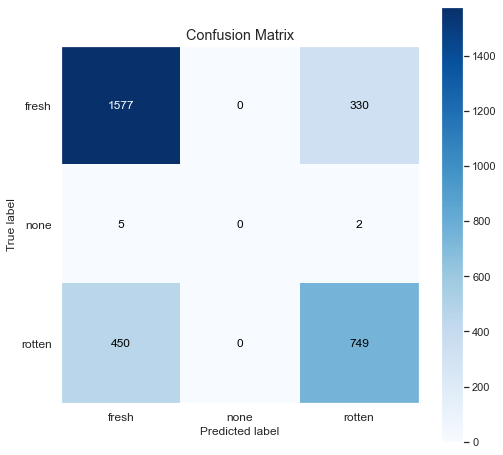

In [39]:
# LR 80:20
start_time = time.time()

_, itest = train_test_split(range(data.shape[0]), train_size=0.8)
mask = np.zeros(data.shape[0], dtype=np.bool)
mask[itest] = True

clf_lr = LogisticRegression(multi_class='ovr', random_state=42)

Xtfidf.todense()
y = data.fresh.values
X_train, X_test, y_train, y_test = train_test_split(Xtfidf, y, train_size = 0.8)
gsc_lr = GridSearchCV(
    estimator=clf_lr,
    param_grid={
        'solver': ['newton-cg', 'sag', 'saga'],
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-4, 10e-3, 10e-2, 10e-1, 10e-0],
    },
    scoring='accuracy',
    cv=2
)

grid_lr = gsc_lr.fit(X_train, y_train)

print()
print("LogisticRegression best parameters and score")
print("Best score: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

pred_lr = grid_lr.predict(X_test)
print("Accuracy score after tuning:", accuracy_score(y_test, pred_lr))            
print('precision score: ', precision_score(y_test, pred_lr, average='weighted'))
print('recall score: ', recall_score(y_test, pred_lr, average='weighted'))
print('f1 score: ', f1_score(y_test, pred_lr, average='weighted'))
print()

tuning_performance.loc['LogisticRegression']['training-time'] = time.time() - start_time
tuning_performance.loc['LogisticRegression']['accuracy'] = accuracy_score(y_test, pred_lr)
tuning_performance.loc['LogisticRegression']['F1-score'] = f1_score(y_test, pred_lr, average='weighted')

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, pred_lr)

In [40]:
print(classification_report(y_test, pred_lr))
print()

              precision    recall  f1-score   support

       fresh       0.78      0.83      0.80      1907
        none       0.00      0.00      0.00         7
      rotten       0.69      0.62      0.66      1199

    accuracy                           0.75      3113
   macro avg       0.49      0.48      0.49      3113
weighted avg       0.74      0.75      0.74      3113




C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2952429617.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape[0], dtype=np.bool)



LogisticRegression best parameters and score
Best score: 0.739432 using {'C': 10, 'solver': 'saga', 'tol': 0.1}
Accuracy score after tuning: 0.7565831727681439
precision score:  0.7532480286198872
recall score:  0.7565831727681439
f1 score:  0.7543234071297787



C:\Users\Maulidan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

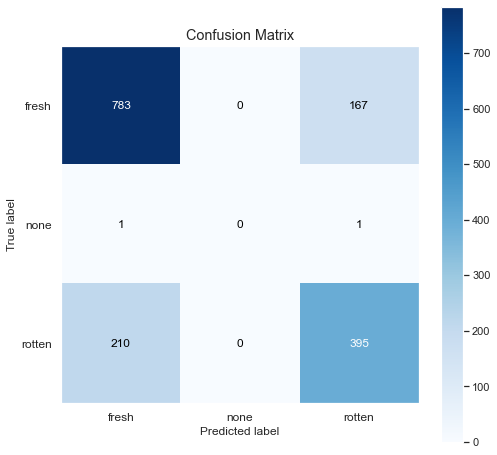

In [41]:
# LR 90:10
start_time = time.time()

_, itest = train_test_split(range(data.shape[0]), train_size=0.9)
mask = np.zeros(data.shape[0], dtype=np.bool)
mask[itest] = True

clf_lr = LogisticRegression(multi_class='ovr', random_state=42)

Xtfidf.todense()
y = data.fresh.values
X_train, X_test, y_train, y_test = train_test_split(Xtfidf, y, train_size = 0.9)
gsc_lr = GridSearchCV(
    estimator=clf_lr,
    param_grid={
        'solver': ['newton-cg', 'sag', 'saga'],
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-4, 10e-3, 10e-2, 10e-1, 10e-0],
    },
    scoring='accuracy',
    cv=2
)

grid_lr = gsc_lr.fit(X_train, y_train)

print()
print("LogisticRegression best parameters and score")
print("Best score: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

pred_lr = grid_lr.predict(X_test)
print("Accuracy score after tuning:", accuracy_score(y_test, pred_lr))            
print('precision score: ', precision_score(y_test, pred_lr, average='weighted'))
print('recall score: ', recall_score(y_test, pred_lr, average='weighted'))
print('f1 score: ', f1_score(y_test, pred_lr, average='weighted'))
print()

tuning_performance_10.loc['LogisticRegression']['training-time'] = time.time() - start_time
tuning_performance_10.loc['LogisticRegression']['accuracy'] = accuracy_score(y_test, pred_lr)
tuning_performance_10.loc['LogisticRegression']['F1-score'] = f1_score(y_test, pred_lr, average='weighted')

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, pred_lr)

## TUNING LINEAR SVC

In [42]:
#SVM 80:20
start_time = time.time()

Cs = [0.01, 0.1, 1, 3, 5, 10]
min_dfs = [0.01, 0.1, 1, 3, 5, 10] 
_, itest = train_test_split(range(data.shape[0]), train_size=0.8)
mask = np.zeros(data.shape[0], dtype=np.bool)
mask[itest] = True

#Find the best value for C and min_df
best_C = None
best_min_df = None 
maxscore=-np.inf
for c in Cs:
    for min_df in min_dfs: 
        tfidfvectorizer = TfidfVectorizer(min_df=min_df, stop_words='english')
        Xtfidf=tfidfvectorizer.fit_transform(data.quote)     
        Xtfidf.todense()
        y = (data.fresh == 'fresh').values.astype(np.int)
        Xtrainthis = Xtfidf[mask]
        ytrainthis = y[mask]
        clf = LinearSVC(C = c)
        result = 0.
        nfold = 5
        for train, test in KFold(nfold).split(Xtrainthis): 
            clf.fit(Xtrainthis[train], ytrainthis[train]) # fit the classifier, passed is as clf.
            result += clf.score(Xtrainthis[test], ytrainthis[test]) # evaluate score function on held-out data
            score = result / nfold # average
        if score > maxscore:
            maxscore = score
            best_C = c 
            best_min_df = min_df
            
print("min_df: {}".format(best_min_df))        
print("C: {}".format(best_C))

tfidfvectorizer = TfidfVectorizer(min_df=best_min_df, stop_words='english')
Xtfidf=tfidfvectorizer.fit_transform(data.quote)     
Xtfidf.todense()
y = (data.fresh == 'fresh').values.astype(np.int)
clf = LinearSVC(C = best_C)
clf.fit(Xtfidf[mask], y[mask])

print('accuracy score for training after tuning: '+ str(clf.score(Xtfidf[mask], y[mask])))
print('accuracy score for test after tuning:'+ str(clf.score(Xtfidf[~mask], y[~mask])))
print()

tuning_performance.loc['LinearSVC']['training-time'] = time.time() - start_time
tuning_performance.loc['LinearSVC']['accuracy'] = clf.score(Xtfidf[mask], y[mask])


C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape[0], dtype=np.bool)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

min_df: 3
C: 1
accuracy score for training after tuning: 0.9948602634115001
accuracy score for test after tuning:0.7009961439588689



C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/2943636190.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)


In [44]:
#SVM
start_time = time.time()

Cs = [0.01, 0.1, 1, 3, 5, 10]
min_dfs = [0.01, 0.1, 1, 3, 5, 10] 
_, itest = train_test_split(range(data.shape[0]), train_size=0.9)
mask = np.zeros(data.shape[0], dtype=np.bool)
mask[itest] = True

#Find the best value for C and min_df
best_C = None
best_min_df = None 
maxscore=-np.inf
for c in Cs:
    for min_df in min_dfs: 
        tfidfvectorizer = TfidfVectorizer(min_df=min_df, stop_words='english')
        Xtfidf=tfidfvectorizer.fit_transform(data.quote)     
        Xtfidf.todense()
        y = (data.fresh == 'fresh').values.astype(np.int)
        Xtrainthis = Xtfidf[mask]
        ytrainthis = y[mask]
        clf = LinearSVC(C = c)
        result = 0.
        nfold = 5
        for train, test in KFold(nfold).split(Xtrainthis): 
            clf.fit(Xtrainthis[train], ytrainthis[train]) # fit the classifier, passed is as clf.
            result += clf.score(Xtrainthis[test], ytrainthis[test]) # evaluate score function on held-out data
            score = result / nfold # average
        if score > maxscore:
            maxscore = score
            best_C = c 
            best_min_df = min_df
            
print("min_df: {}".format(best_min_df))        
print("C: {}".format(best_C))

tfidfvectorizer = TfidfVectorizer(min_df=best_min_df, stop_words='english')
Xtfidf=tfidfvectorizer.fit_transform(data.quote)     
Xtfidf.todense()
y = (data.fresh == 'fresh').values.astype(np.int)
clf = LinearSVC(C = best_C)
clf.fit(Xtfidf[mask], y[mask])

print('accuracy score for training after tuning: '+ str(clf.score(Xtfidf[mask], y[mask])))
print('accuracy score for test after tuning:'+ str(clf.score(Xtfidf[~mask], y[~mask])))
print()

tuning_performance.loc['LinearSVC']['training-time'] = time.time() - start_time
tuning_performance.loc['LinearSVC']['accuracy'] = clf.score(Xtfidf[mask], y[mask])

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape[0], dtype=np.bool)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)
C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

min_df: 1
C: 1
accuracy score for training after tuning: 0.9993577392421323
accuracy score for test after tuning:0.6802342187946301



C:\Users\Maulidan\AppData\Local\Temp/ipykernel_29024/3789808916.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (data.fresh == 'fresh').values.astype(np.int)


In [45]:
tuning_performance.sort_values(by='accuracy', ascending=False)

,accuracy,F1-score,training-time
LinearSVC,0.999358,NaN,11.794273
MultinomialNB,0.939627,0.93876,0.034243
LogisticRegression,0.747189,0.743566,8.876454
BernoulliNB,0.667951,0.589646,0.02006
